# Auto Encoder example on MNIST handwritten digits

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Import MNIST data

In [2]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


## Parameters

In [3]:
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10

## Network Parameters

In [4]:
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 1st layer num features
n_input = 784 # MNIST data input (img shape: 28*28)

## tf Graph input

In [5]:
X = tf.placeholder(tf.float32, [None, n_input])

## Weights and biases

In [7]:
weights_encoder = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
}

weights_decoder = {
    'h1': tf.transpose(weights_encoder['h2']),
    'h2': tf.transpose(weights_encoder['h1'])
}

In [12]:
biases_encoder = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2]))
}

biases_decoder = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_input]))
}

## Build the encoder

In [13]:
def encoder(x):
    # Encoder Hidden Layer with relu activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights_encoder['h1']), biases_encoder['b1']))
    # Encoder Hidden Layer with relu activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights_encoder['h2']), biases_encoder['b2']))
    return layer_2

## Build the decoder

In [14]:
def decoder(x):
    # Decoder Hidden Layer with relu activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights_decoder['h1']), biases_decoder['b1']))
    # Decoder Hidden Layer with relu activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights_decoder['h2']), biases_decoder['b2']))
    return layer_2

## Construct the model

In [15]:
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

In [16]:
y_pred = decoder_op
y_true = X

## Define loss and optimizer

In [17]:
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2)) # squared error

In [18]:
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

## Initialize the variables

In [19]:
init = tf.initialize_all_variables()

## Launch the graph

Epoch 0001 cost= 0.204994515
Epoch 0002 cost= 0.165601864
Epoch 0003 cost= 0.141181707
Epoch 0004 cost= 0.131169811
Epoch 0005 cost= 0.120872758
Epoch 0006 cost= 0.112972066
Epoch 0007 cost= 0.109520733
Epoch 0008 cost= 0.103743494
Epoch 0009 cost= 0.097108439
Epoch 0010 cost= 0.095492013
Epoch 0011 cost= 0.093814977
Epoch 0012 cost= 0.086898908
Epoch 0013 cost= 0.085266680
Epoch 0014 cost= 0.082059667
Epoch 0015 cost= 0.077342220
Epoch 0016 cost= 0.074575894
Epoch 0017 cost= 0.071720049
Epoch 0018 cost= 0.070705935
Epoch 0019 cost= 0.070526272
Epoch 0020 cost= 0.068128884
Optimization finished!


/home/diogo/bin/anaconda3/envs/tensorflow/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


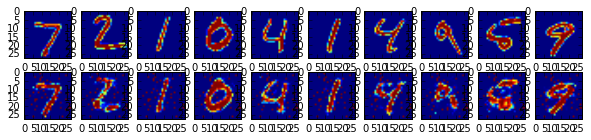

In [20]:
with tf.Session() as sess:
    sess.run(init)
    total_batch = int(mnist.train.num_examples / batch_size)
    # Training cycle
    for epoch in range(training_epochs):
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            _, cost_value = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch {:04d} cost= {:.9f}".format(epoch+1, cost_value))
    
    print("Optimization finished!")
    
    # Applying encode and decode over test set
    encode_decode = sess.run(y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})
    # Compare original images with their reconstructions
    f, a = plt.subplots(2, examples_to_show, figsize=(examples_to_show,2))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
    f.show()
    plt.draw()